## Loading and Preprocessing the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm

In [2]:
# Load the dataset
df = pd.read_csv('datasets/healthcare_dataset.csv')
# Clean column names (remove spaces, special characters)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


In [3]:
df

,name,age,gender,blood_type,medical_condition,date_of_admission,doctor,hospital,insurance_provider,billing_amount,room_number,admission_type,discharge_date,medication,test_results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


In [4]:
df.columns

Index(['name', 'age', 'gender', 'blood_type', 'medical_condition',
       'date_of_admission', 'doctor', 'hospital', 'insurance_provider',
       'billing_amount', 'room_number', 'admission_type', 'discharge_date',
       'medication', 'test_results'],
      dtype='object')

In [5]:
# Clean column names (remove spaces, special characters)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [6]:
# Convert dates to datetime
df['date_of_admission'] = pd.to_datetime(df['date_of_admission'])
df['discharge_date'] = pd.to_datetime(df['discharge_date'])

In [7]:
df

,name,age,gender,blood_type,medical_condition,date_of_admission,doctor,hospital,insurance_provider,billing_amount,room_number,admission_type,discharge_date,medication,test_results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


In [8]:
# Calculate length of stay (LOS)
df['length_of_stay'] = (df['discharge_date'] - df['date_of_admission']).dt.days
df['length_of_stay']

0         2
1         6
2        15
3        30
4        20
         ..
55495    30
55496     9
55497    28
55498     6
55499    27
Name: length_of_stay, Length: 55500, dtype: int64

In [9]:
# Encode categorical variables
label_encoders = {}
categorical_cols = ['gender', 'blood_type', 'medical_condition', 'doctor', 'hospital', 'insurance_provider', 'admission_type', 'medication', 'test_results']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le  # Store encoders for inverse transform later

## Exploratory Data Analysis (EDA)

Demographic Analysis

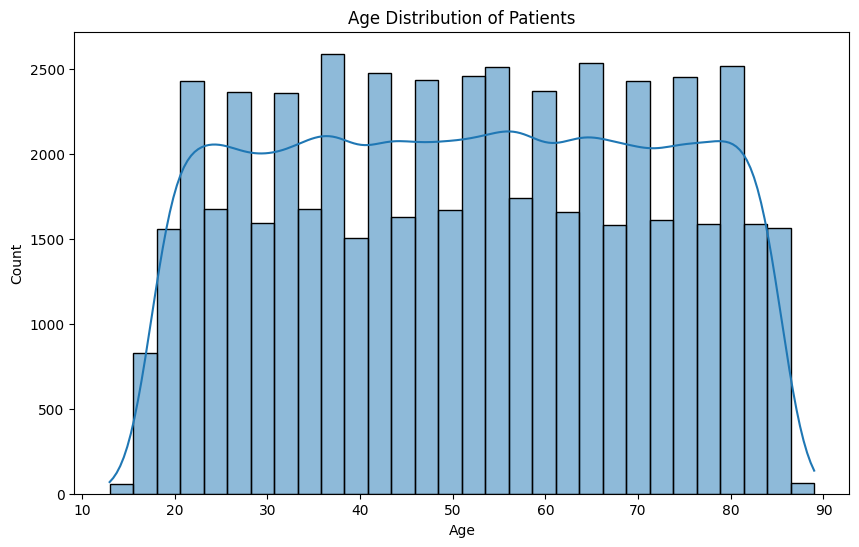

In [10]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

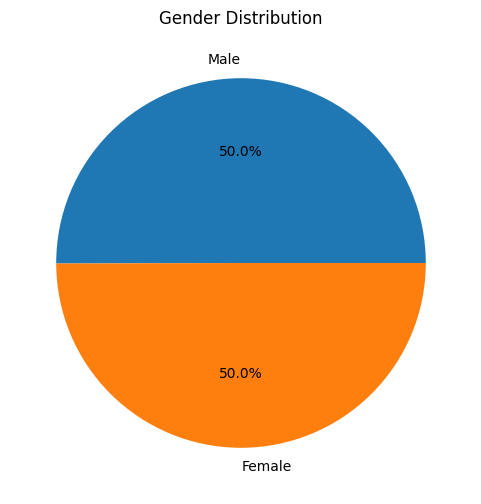

In [11]:

# Gender distribution
gender_counts = df['gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=['Female' if x == 0 else 'Male' for x in gender_counts.index], autopct='%1.1f%%')
plt.title("Gender Distribution")
plt.show()

### Medical Conditions & Blood Types

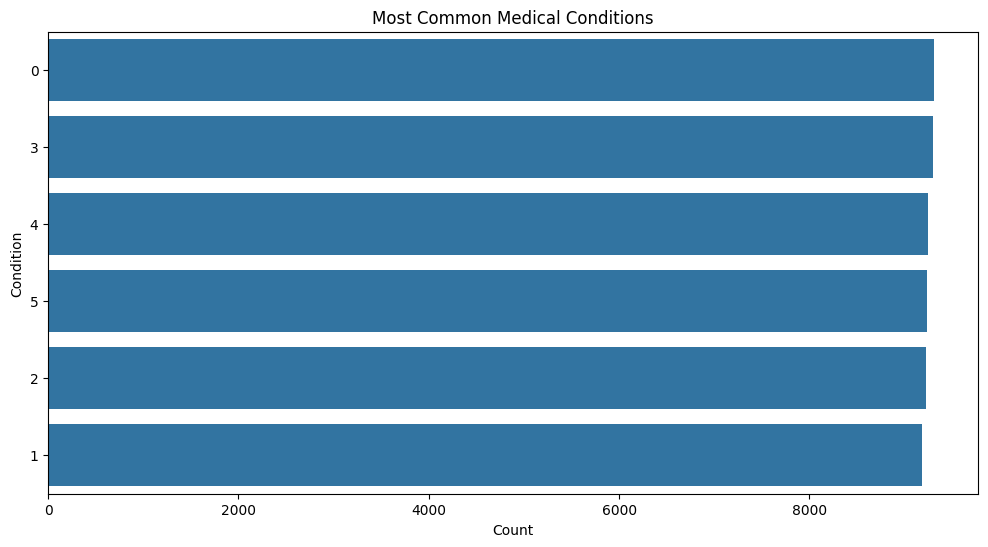

In [12]:
# Top medical conditions
plt.figure(figsize=(12, 6))
sns.countplot(y='medical_condition', data=df, order=df['medical_condition'].value_counts().index)
plt.title("Most Common Medical Conditions")
plt.xlabel("Count")
plt.ylabel("Condition")
plt.show()

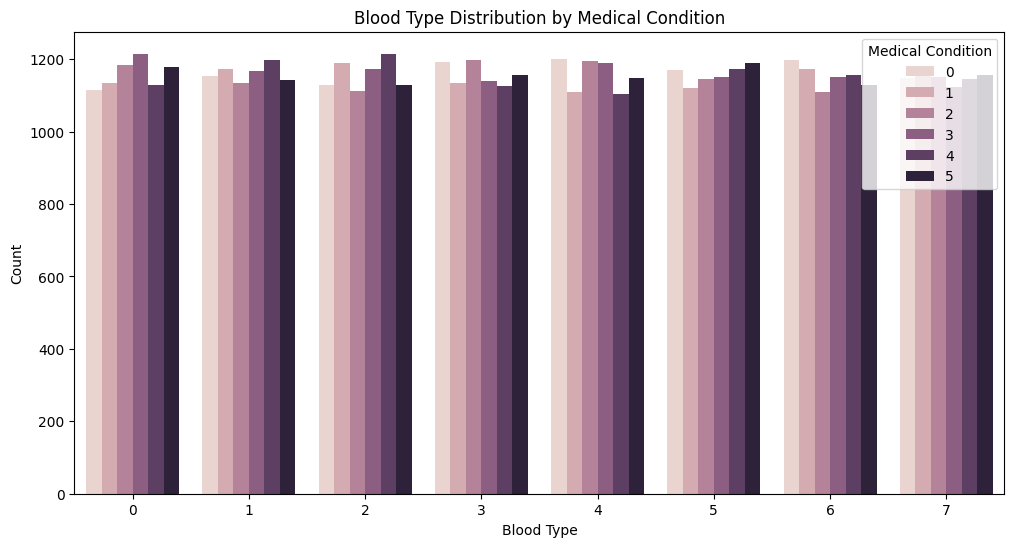

In [13]:

# Blood type distribution by condition
plt.figure(figsize=(12, 6))
sns.countplot(x='blood_type', hue='medical_condition', data=df)
plt.title("Blood Type Distribution by Medical Condition")
plt.xlabel("Blood Type")
plt.ylabel("Count")
plt.legend(title="Medical Condition")
plt.show()

### Billing & Insurance Analysis

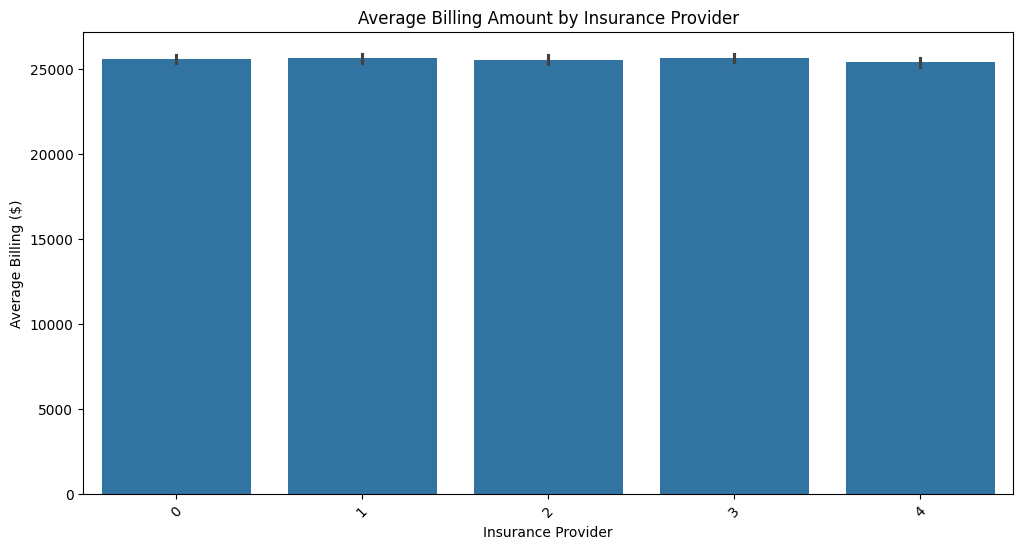

In [14]:
# Average billing by insurance provider
plt.figure(figsize=(12, 6))
sns.barplot(x='insurance_provider', y='billing_amount', data=df, estimator=np.mean)
plt.title("Average Billing Amount by Insurance Provider")
plt.xlabel("Insurance Provider")
plt.ylabel("Average Billing ($)")
plt.xticks(rotation=45)
plt.show()


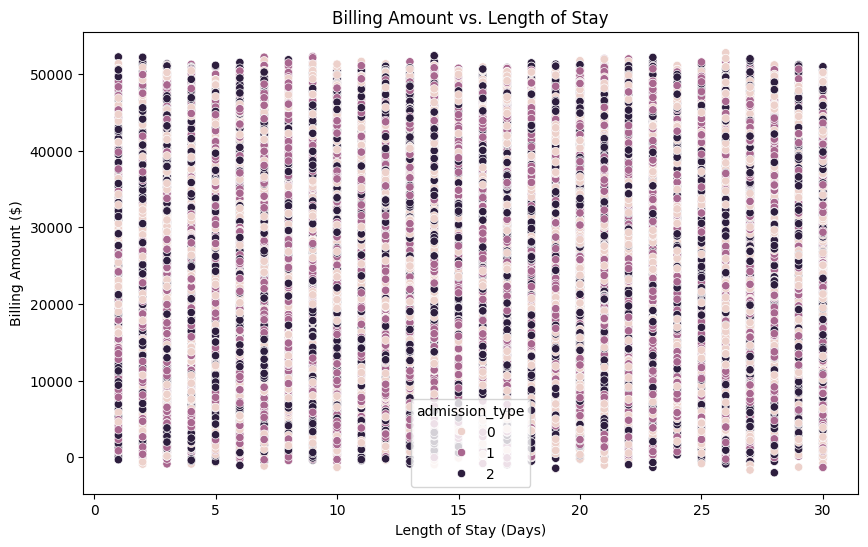

In [15]:
# Billing amount vs. length of stay
plt.figure(figsize=(10, 6))
sns.scatterplot(x='length_of_stay', y='billing_amount', data=df, hue='admission_type')
plt.title("Billing Amount vs. Length of Stay")
plt.xlabel("Length of Stay (Days)")
plt.ylabel("Billing Amount ($)")
plt.show()

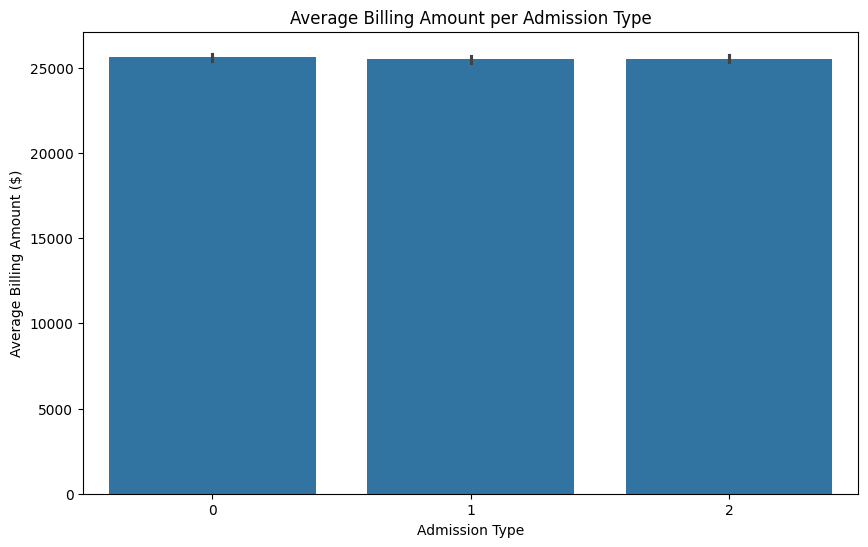

In [16]:
# Assuming you have already calculated 'length_of_stay' and have your DataFrame 'df'

plt.figure(figsize=(10, 6))
sns.barplot(x='admission_type', y='billing_amount', data=df)
plt.title("Average Billing Amount per Admission Type")
plt.xlabel("Admission Type")
plt.ylabel("Average Billing Amount ($)")
plt.show()

### Statistical Analysis
#### Hypothesis Testing
Question: Is there a significant difference in billing amounts between genders?

In [17]:
male_billing = df[df['gender'] == 1]['billing_amount']
female_billing = df[df['gender'] == 0]['billing_amount']

# T-test
t_stat, p_value = stats.ttest_ind(male_billing, female_billing)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject null hypothesis: Significant difference in billing by gender.")
else:
    print("Fail to reject null hypothesis: No significant difference.")

T-statistic: 1.14, P-value: 0.2554
Fail to reject null hypothesis: No significant difference.


#### Correlation Analysis

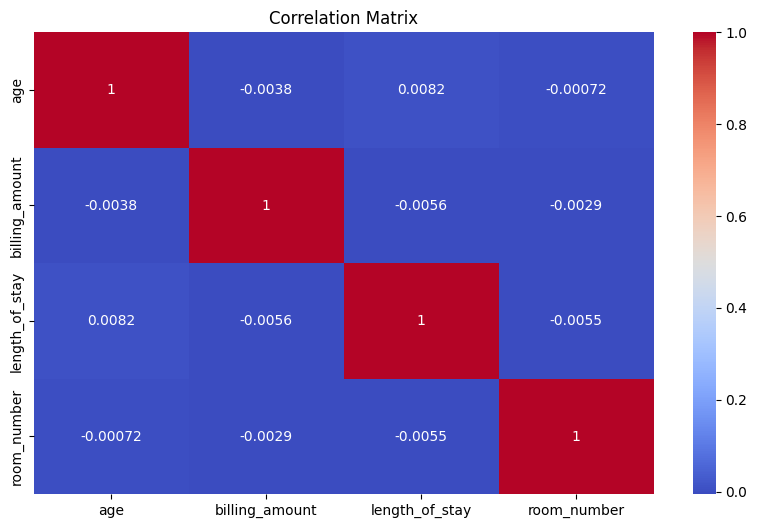

In [18]:
# Correlation matrix
corr_matrix = df[['age', 'billing_amount', 'length_of_stay', 'room_number']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

### Predictive Modeling
#### Goal: Predict test_results (Normal/Abnormal) based on patient data.
#### Feature Engineering

In [19]:
# Select features and target
X = df[['age', 'gender', 'blood_type', 'medical_condition', 'billing_amount', 'length_of_stay', 'admission_type']]
y = df['test_results']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y

0        2
1        1
2        2
3        0
4        0
        ..
55495    0
55496    2
55497    0
55498    0
55499    0
Name: test_results, Length: 55500, dtype: int64

### Random Forest Classifier

In [20]:
# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
model

RandomForestClassifier(random_state=42)

In [21]:
# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.43      0.43      0.43      5643
           1       0.41      0.42      0.42      5418
           2       0.42      0.41      0.42      5589

    accuracy                           0.42     16650
   macro avg       0.42      0.42      0.42     16650
weighted avg       0.42      0.42      0.42     16650



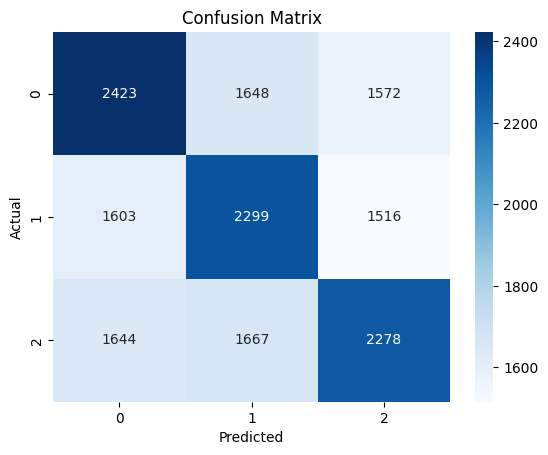

In [22]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### Feature Importance

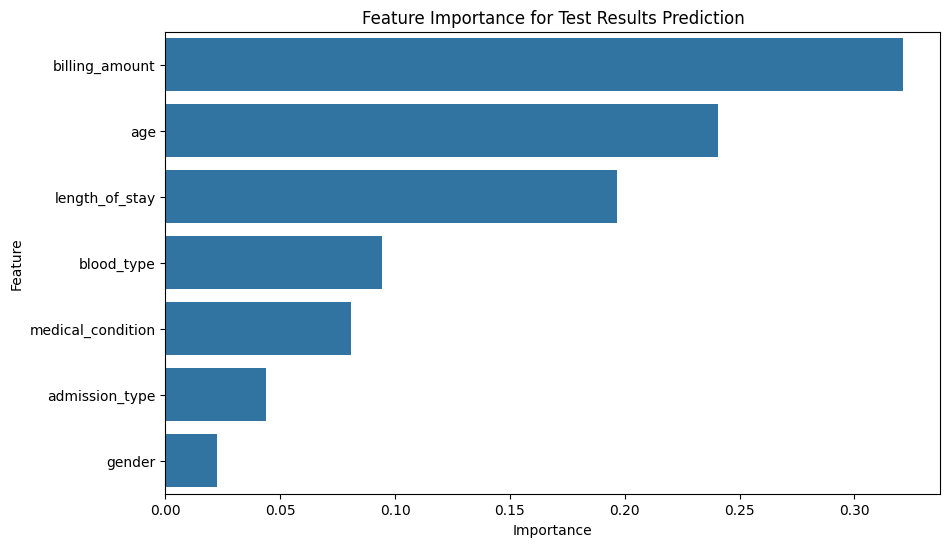

In [23]:
# Plot feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title("Feature Importance for Test Results Prediction")
plt.show()

### 5. Advanced Analysis (Time Series)

Question: Are there seasonal trends in admissions?

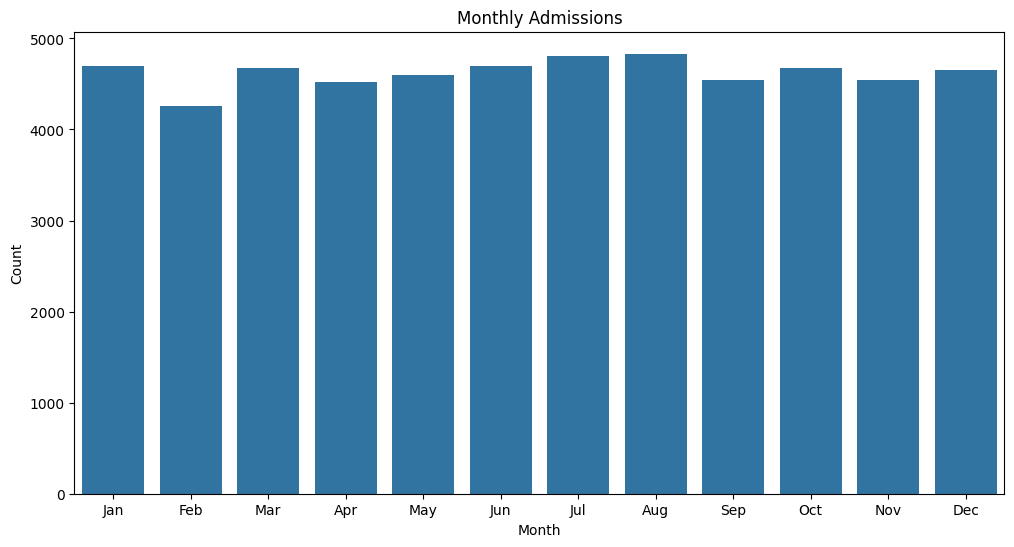

In [25]:
import calendar  # Import the calendar module

# Extract month number and map to month name
df['admission_month'] = df['date_of_admission'].dt.month
# Full name: calendar.month_name[x]
df['month_name'] = df['admission_month'].apply(lambda x: calendar.month_abbr[x])  

# Plot admissions by month name (sorted correctly)
plt.figure(figsize=(12, 6))
# Ensures correct order (Jan-Dec)
month_order = [calendar.month_abbr[i] for i in range(1, 13)]  
sns.countplot(x='month_name', data=df, order=month_order)
plt.title("Monthly Admissions")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()